- [ ] Fourier transform thing
    - [ ] 1. Do Fourier transform of image, select the top k moments
    - [ ] 2. See how many we need to classify properly

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_testimage():
    x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(x, x)
    wavelength = 100
    angle = np.pi/9
    grating = np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
    )
    return grating

In [10]:
def fft2d(img):
    """
    Perform a 2D Fast Fourier Transform (FFT) on the input image.

    :param img: The input image to be transformed.
    :type img: numpy.ndarray

    :return: The transformed image.
    :rtype: numpy.ndarray
    """
    ft = np.fft.ifftshift(img)
    ft = np.fft.fft2(img)
    return np.fft.fftshift(ft)


def ifft2d(ft):
    """
    Perform 2D real inverse fast Fourier transform (IFFT) on the input array.

    Parameters:
    ft (ndarray): The input array containing the Fourier transform.

    Returns:
    ndarray: The inverse Fourier transform of the input array.

    """
    ift = np.fft.ifftshift(ft)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real 

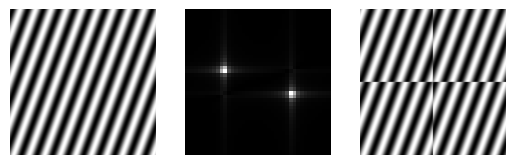

In [11]:
def plot_im_ft_ift(img):
    ft = fft2d(img)
    ift = ifft2d(ft)

    plt.set_cmap("gray")
    plt.subplot(131)
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(132)
    plt.imshow(abs(ft))
    plt.axis("off")
    plt.xlim([480, 520])
    plt.ylim([520, 480])

    plt.subplot(133)
    plt.imshow(ift)
    plt.axis("off")
    plt.show()

testim = gen_testimage()
plot_im_ft_ift(testim)

In [ ]:
def truncate_frequencies():
    """Only get the top n frequencies of the fourier transform.
    Return the transformed image
    """



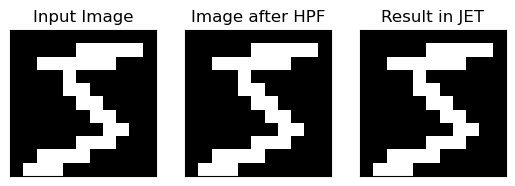

In [51]:
img = np.genfromtxt("../data/INPUT_all/data/train-images-unlabeled-5.dat",delimiter=1, dtype=int)[0].reshape((11,11))

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
 
rows, cols = img.shape
crow, ccol = rows//2, cols//2
# fshift[crow-30:crow+31, ccol-30:ccol+31] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
 
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
 
plt.show()

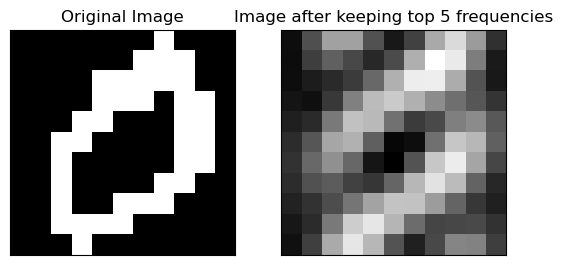

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def keep_largest_k_frequencies(img, k):
    """
    Applies a high pass filter to the Fourier transform of an image,
      keeping only the largest (highest magnitude) k frequencies.

    Parameters:
    img (ndarray): The input image.
    k (int): The number of frequencies to keep.

    Returns:
    ndarray: The reconstructed image after applying the mask to the Fourier transform.
    """

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitudes = np.abs(fshift)
    # Get the indices of the top k frequencies and mask them
    indices = np.unravel_index(np.argsort(magnitudes.ravel())[-k:], magnitudes.shape)
    mask = np.zeros_like(fshift, dtype=bool)
    mask[indices] = True
    fshift_masked = fshift * mask

    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    return np.real(img_back)

# Test the function
img = np.genfromtxt("../data/INPUT_all/data/train-images-unlabeled-0.dat",delimiter=1, dtype=int)[0].reshape((11,11))
img_back = keep_largest_k_frequencies(img, 10)

# Visualize the results
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after keeping top 5 frequencies'), plt.xticks([]), plt.yticks([])
plt.show()

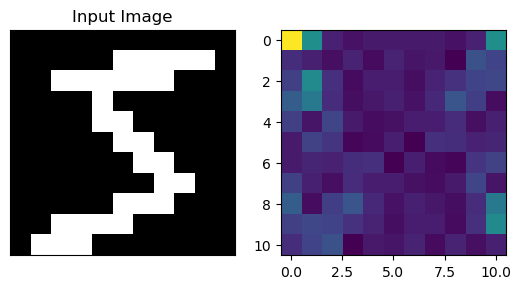

In [48]:
img = np.genfromtxt("../data/INPUT_all/data/train-images-unlabeled-5.dat",delimiter=1, dtype=int)[0].reshape((11,11))

f = np.fft.fft2(img)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(abs(f),cmap="viridis")

plt.show()

In [44]:
f_ishift.real

array([[ 37.        , -11.3964185 , -10.9989746 ,  -1.7334757 ,
          2.66083866,   2.96803013,   2.96803013,   2.66083866,
         -1.7334757 , -10.9989746 , -11.3964185 ],
       [ -4.47756025,   1.52629998,  10.48015903,   0.20639536,
         -6.87538438,   0.87133705,  -5.2662221 ,   2.54019223,
          7.89089712,   2.9638551 ,  -9.85996915],
       [ -6.97495245,  13.64512848, -12.81067426,   0.87133705,
          4.80100805,   1.86559047,  -2.62945414,  -3.03061317,
          1.12774405,   2.60335386,   0.53153206],
       [ -3.16121141,   0.29676327,  -1.6987135 ,   4.13897525,
         -1.57384668,  -0.35370193,   0.96657074,  -2.26508366,
         -0.50642042,   3.02588299,   1.13078534],
       [  0.86245959,  -1.30675463,   5.69854289,  -5.99902785,
         -1.5213701 ,   3.83671045,   0.53153206,  -0.34936755,
         -1.97046263,   1.13078534,  -0.91304757],
       [  0.75126452,  -1.08051215,  -1.57384668,   2.54019223,
         -1.29606958,   1.16676913,   0.6

In [ ]:

ft = fft2d(testim)
# ift = ifft2d(ft)